<a href="https://colab.research.google.com/github/Ether-silicon/OAS5033_Big_Data_Analytics/blob/main/Activity_3_Data_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OAS5033 Big Data Analytics - Activity 3 Data Profiling
* Prepared by: Teh Yoong Sin 24002113
* Date: 30/10/2024
* Dataset: Sample dataset from Google Collab /content/sample_data/california_housing_train.csv

### Import libraries and datasets

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")


### Basic Data Profiling

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


### Data Visualization

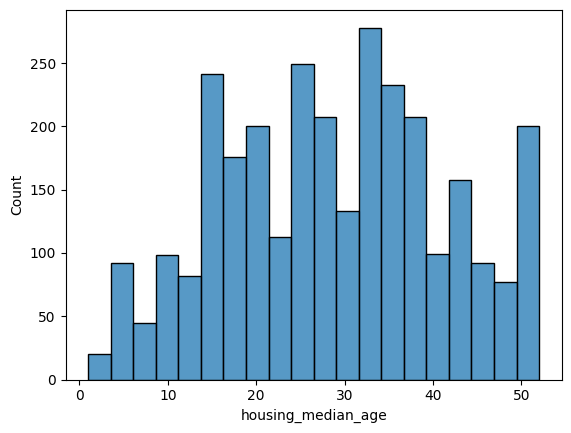

In [8]:
# Histogram plot
sns.histplot(df['housing_median_age'])
plt.show()

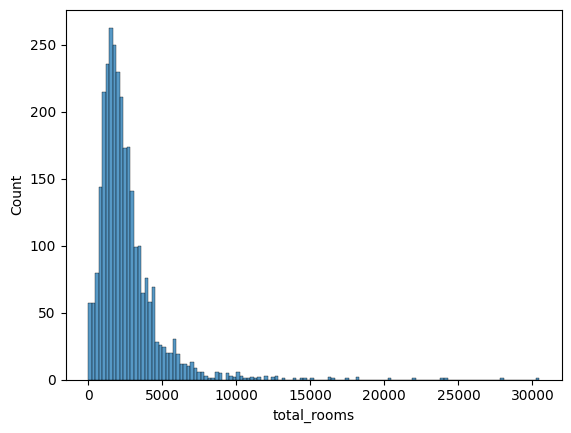

In [9]:
sns.histplot(df['total_rooms'])
plt.show()

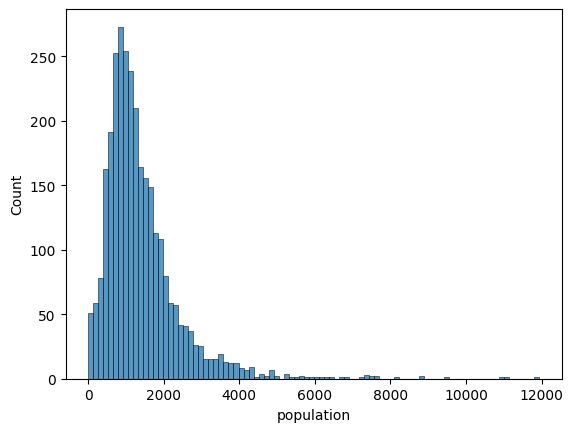

In [10]:
sns.histplot(df['population'])
plt.show()

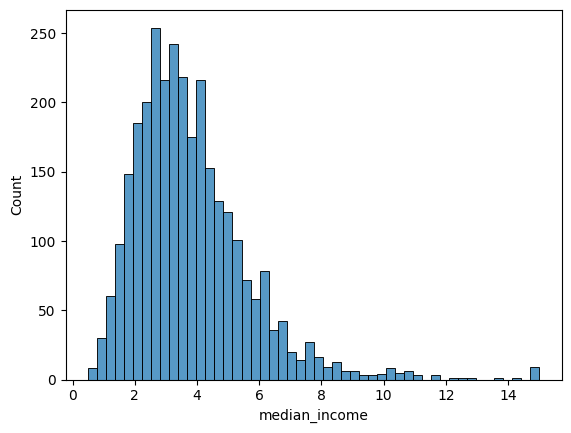

In [11]:
sns.histplot(df['median_income'])
plt.show()

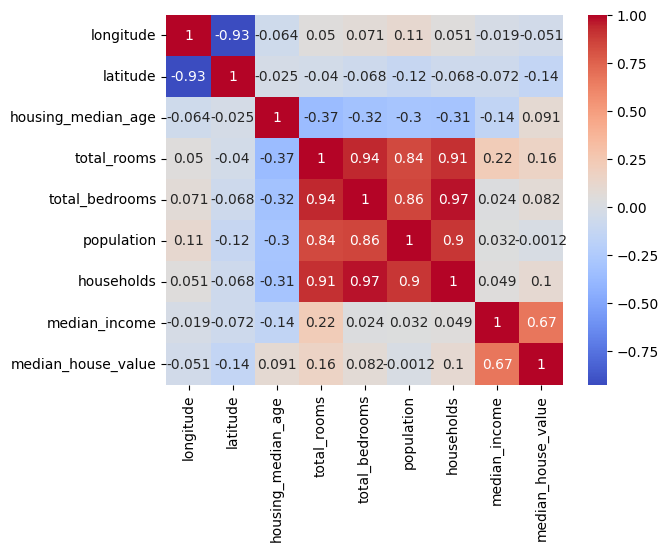

In [12]:
# Calculate correlation matrix using Pearson method
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()


<Axes: >

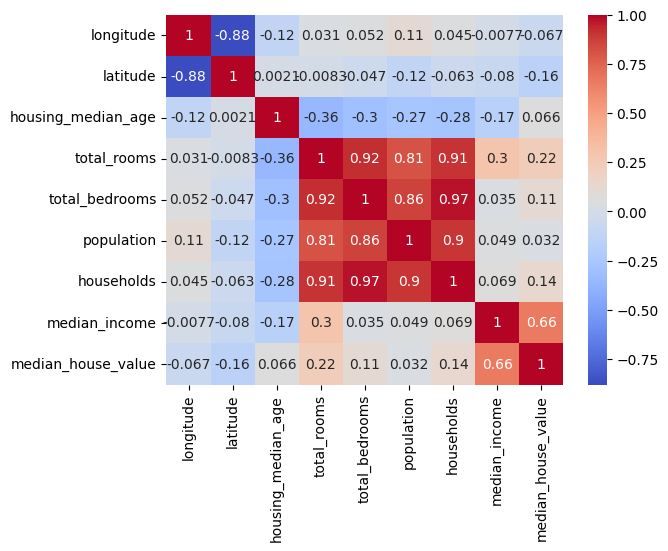

In [13]:

# Calculate correlation matrix using Spearman method
correlation_matrix = df.corr(method='spearman')

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

### Handling Missing Value

In [14]:
# Check for missing values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


no missing value or null value spotted in this dataset.

### Spot outliers

In [15]:
# Using the IQR method for outlier detection (example)
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_income'] < lower_bound) | (df['median_income'] > upper_bound)]
print(outliers)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
42      -118.06     34.15                37.0       1980.0           226.0   
117     -122.07     37.34                30.0       1851.0           238.0   
118     -117.18     33.02                15.0       3540.0           453.0   
124     -117.81     33.84                17.0       4343.0           515.0   
135     -122.34     37.56                39.0       3562.0           391.0   
...         ...       ...                 ...          ...             ...   
2771    -121.99     37.83                16.0       2939.0           380.0   
2850    -122.10     37.36                35.0       2063.0           266.0   
2869    -117.43     33.55                 8.0        446.0            62.0   
2917    -122.59     38.04                25.0       3412.0           455.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

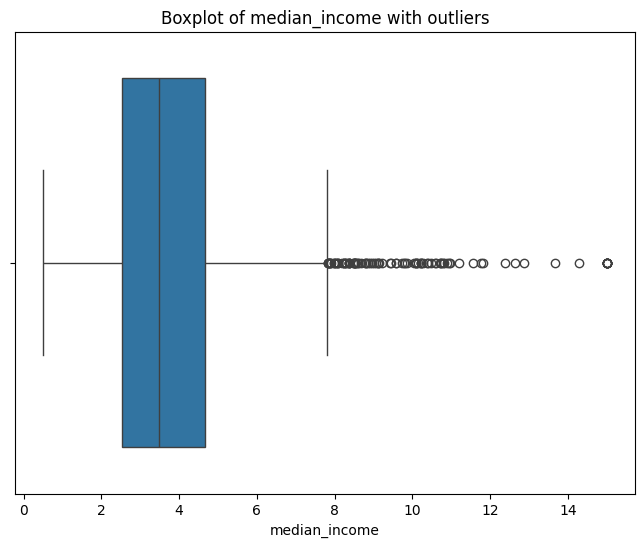

In [22]:

  # Further analysis: Visualization and/or removal
  # Boxplot visualization
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df['median_income'])
  plt.title(f'Boxplot of median_income with outliers')
  plt.show()